In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from sklearn.manifold import TSNE

def k_means(points, k):
    maxiter = 50
    def initialize_centroids(points, k):
        centroids = points.copy()
        np.random.shuffle(centroids)
        return centroids[:k]
    def closest_centroid(points, centroids):
        distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)
    def move_centroids(points, closest, centroids):
        return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])
    centroids = initialize_centroids(points, k)
    for j in tqdm(range(0, maxiter)):
        CC = closest_centroid(points, centroids)
        centroids = move_centroids(points, CC, centroids)
    return CC

In [4]:
kosarak = pd.read_csv('kosarak.dat', names=[1])

In [5]:
kosarak_array = [[int(z) for z in y.split()] for y in kosarak[1]]

In [6]:
cnt = {}
for row in kosarak_array:
    for x in row:
        cnt[x] = cnt.get(x, 0) + 1
        
cnt = dict(sorted(cnt.items(), key=lambda x: x[1], reverse=True))
cnt

{6: 601374,
 3: 450031,
 11: 364065,
 1: 197522,
 218: 88598,
 7: 86898,
 4: 78097,
 27: 72134,
 148: 69922,
 55: 65412,
 64: 48262,
 77: 43454,
 2: 42927,
 138: 35127,
 294: 32247,
 83: 32212,
 316: 27852,
 40: 24082,
 136: 23679,
 446: 23270,
 490: 23225,
 69: 22631,
 90: 22062,
 215: 21592,
 205: 21373,
 303: 21246,
 278: 20114,
 438: 18910,
 73: 18749,
 87: 18484,
 269: 18343,
 135: 18313,
 987: 17804,
 737: 17645,
 273: 17177,
 56: 15752,
 314: 14842,
 504: 14546,
 897: 14297,
 512: 12921,
 49: 12702,
 25: 12668,
 91: 12248,
 364: 12167,
 14: 11607,
 378: 11508,
 155: 11494,
 32: 11069,
 423: 10967,
 667: 10616,
 361: 10122,
 28: 10111,
 254: 10077,
 229: 10034,
 379: 9783,
 321: 9559,
 747: 9368,
 993: 9231,
 640: 9163,
 916: 8989,
 670: 8938,
 46: 8827,
 86: 8823,
 85: 8801,
 21: 8763,
 644: 8673,
 246: 8642,
 1644: 8606,
 662: 8448,
 255: 8364,
 259: 8150,
 230: 8123,
 762: 8071,
 290: 7876,
 521: 7826,
 540: 7710,
 281: 7673,
 145: 7672,
 934: 7621,
 584: 7598,
 777: 7556,
 49

## A

In [7]:
T = np.array(list(cnt.items())[:1000])
index = {}
for i, item in enumerate(T):
    index[item[0]] = i
index

{6: 0,
 3: 1,
 11: 2,
 1: 3,
 218: 4,
 7: 5,
 4: 6,
 27: 7,
 148: 8,
 55: 9,
 64: 10,
 77: 11,
 2: 12,
 138: 13,
 294: 14,
 83: 15,
 316: 16,
 40: 17,
 136: 18,
 446: 19,
 490: 20,
 69: 21,
 90: 22,
 215: 23,
 205: 24,
 303: 25,
 278: 26,
 438: 27,
 73: 28,
 87: 29,
 269: 30,
 135: 31,
 987: 32,
 737: 33,
 273: 34,
 56: 35,
 314: 36,
 504: 37,
 897: 38,
 512: 39,
 49: 40,
 25: 41,
 91: 42,
 364: 43,
 14: 44,
 378: 45,
 155: 46,
 32: 47,
 423: 48,
 667: 49,
 361: 50,
 28: 51,
 254: 52,
 229: 53,
 379: 54,
 321: 55,
 747: 56,
 993: 57,
 640: 58,
 916: 59,
 670: 60,
 46: 61,
 86: 62,
 85: 63,
 21: 64,
 644: 65,
 246: 66,
 1644: 67,
 662: 68,
 255: 69,
 259: 70,
 230: 71,
 762: 72,
 290: 73,
 521: 74,
 540: 75,
 281: 76,
 145: 77,
 934: 78,
 584: 79,
 777: 80,
 494: 81,
 514: 82,
 142: 83,
 260: 84,
 633: 85,
 357: 86,
 89: 87,
 506: 88,
 491: 89,
 1132: 90,
 265: 91,
 531: 92,
 2952: 93,
 492: 94,
 1025: 95,
 522: 96,
 71: 97,
 45: 98,
 233: 99,
 1838: 100,
 632: 101,
 435: 102,
 473: 103

## B

In [8]:
most_bought = set(T[:,0])
mx = max(cnt.keys())
bought_with_T = np.zeros((mx + 1) * 1000).reshape(mx + 1, 1000)
for row in tqdm(kosarak_array):
    for i in range(len(row)):
        for j in range(i+1, len(row)):
            if row[j] in most_bought and row[j] != row[i]:
                bought_with_T[row[i]][index[row[j]]] += 1

In [9]:
bought_with_T.astype(np.int)

array([[     0,      0,      0, ...,      0,      0,      0],
       [132113,  84660,      0, ...,    386,    585,    708],
       [     0,  19438,      0, ...,    161,    117,    129],
       ...,
       [     0,      1,      0, ...,      0,      0,      0],
       [     0,      0,      0, ...,      0,      0,      0],
       [     0,      1,      0, ...,      0,      0,      0]])

## C

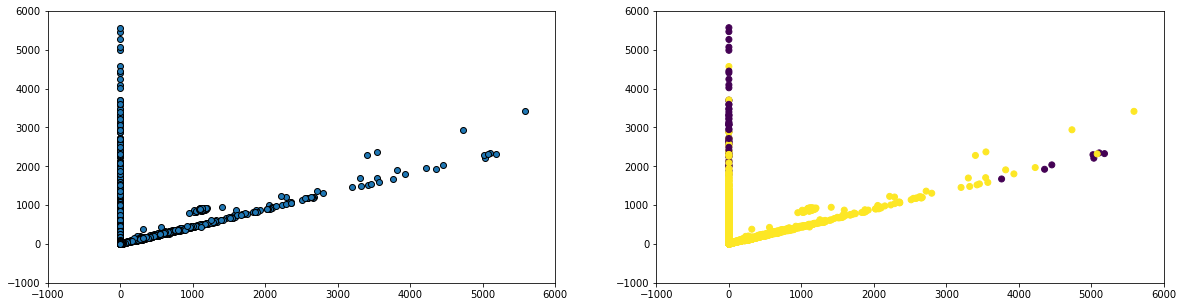

In [10]:
def runK_Means(k, data):
    classes = k_means(data, k)
    group_colors = np.random.randn(k)
    colors = [group_colors[j] for j in classes]
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(20, 5)
    ax1.set_xlim(-1000, 6000)
    ax1.set_ylim(-1000, 6000)
    ax1.scatter(data[:,0], data[:,1], edgecolor='black')
    ax2.set_xlim(-1000, 6000)
    ax2.set_ylim(-1000, 6000)
    ax2.scatter(data[:,0], data[:,1], c=colors)
    
runK_Means(3, bought_with_T)

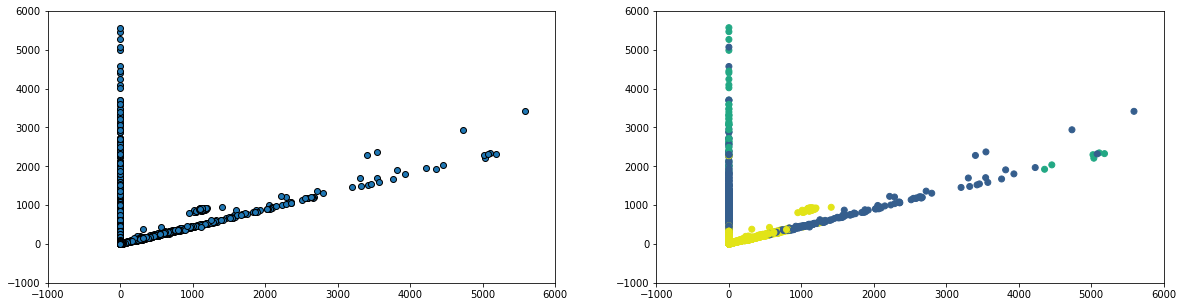

In [11]:
runK_Means(5, bought_with_T)

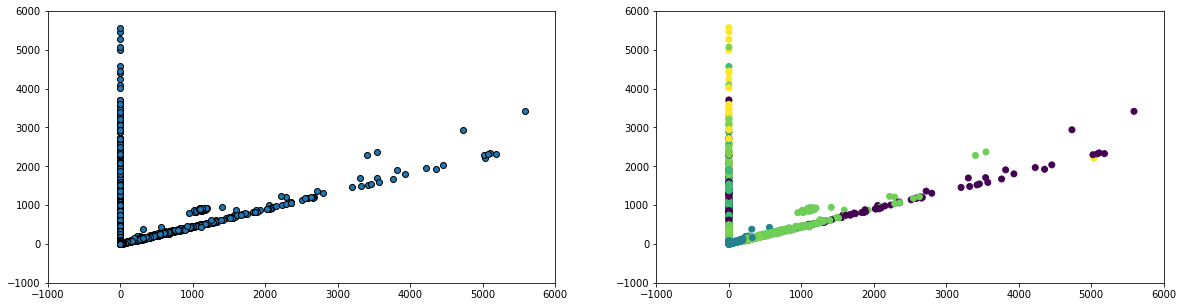

In [12]:
runK_Means(10, bought_with_T)

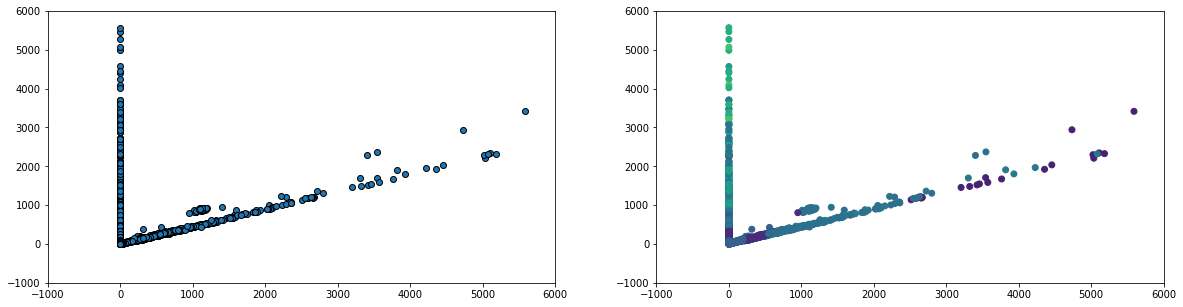

In [17]:
runK_Means(16, bought_with_T)